# HW2: Plotting & viz

due Tuesday Feb 8, 2021 @ 8pm

**submission instructions:**
make a new directory in your HW github repo
(e.g., `<yourname>_hw_2/`)

## Critique the most important figure from a seminal paper in your field

a) Embed (using `<img src= ...`) the original figure/caption along with a link to the original work. 

# [Link to the paper](https://arxiv.org/pdf/1403.0007.pdf)

<img src="data/madaudickinson.png" width="100%">

b) In your own words, what story is this figure trying to convey? What does it do well? What could have been done better? What elements didn't need to be present to still convey the same story?

#### Story:
`The figure is trying to show that the integrated star formation rate of the universe peaked at a redshift of ~2 and has been declining ever since. In the rightmost panels, they show the cosmic star formation rate as measured in the UV and IR separately.`

#### What it does well:
`The authors do a good job at keeping the figure simple and giving the axes in useful units. E.g, having a secondary axis in units of lookback time is very insightful.`

#### What could have been done better:
`All of the IR points are of similar colors (~red). The same should have been done for the UV points. `

#### What elements didn't need to be present:
`It is unecessary for this figure to be three different panels. One panel is sufficient & it's repetitive to have all three. In fact, I didn't even know this figure had three panels because I've only seen the leftmost one presented in talks/class.`

## Reproduce one of your old published-paper quality plots with Bokeh or matplotlib.

a) Provide the original plot, the recreated Bokeh/matlibplot plot, and the Python code used to make the new plot.  You can ask us for an example from us if you don't have your own plots.

<img src="data/beverage.png" width="100%">

In [14]:
from bokeh.io import output_file, show, output_notebook, push_notebook
from bokeh.layouts import row, gridplot, grid
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LinearColorMapper, ColorBar, Range1d
import pandas as pd
from astropy.table import Table
from bokeh.palettes import Viridis256
import numpy as np
from ipywidgets import interact, IntSlider

## show inline in the notebook
output_notebook(hide_banner=True)

    
# import paper data to astropy (because fits extension)
t = Table.read('data/summary_table.fits')
# convert to pandas (because I'm trying to get in the habbit!)
df = t.to_pandas(index='spectid')
df['mgfe-'] = df['mgfe']-df['mgfe-']
df['mgfe+'] = df['mgfe']+df['mgfe+']
df['mgh-'] = df['mgh']-df['mgh-']
df['mgh+'] = df['mgh']+df['mgh+']
df['feh-'] = df['feh']-df['feh-']
df['feh+'] = df['feh']+df['feh+']
# for some reason the index had type == bytes. Convert to more useful type
df.index = df.index.astype('str')


# import charlie conroy comparison data
c = Table.read('data/conroy14_aliza.fits').to_pandas(index='id')
c.index = c.index.astype('str')
# fit line to each column that i plot and save as new column
for key in ['feh','mgh','mgfe']:
    output = np.polyfit(c['lmass'],c[key],1)
    c[key+'_fit'] = c['lmass']*output[0]+output[1]

    
    
# define color map
exp_cmap = LinearColorMapper(palette=Viridis256[::-1],
                             low = 3, 
                             high = 9)


# make first subplot
s1 = figure(x_axis_label=r"$$\rm{log M\; (M}_\odot)$$", 
            y_axis_label='[Fe/H]', 
            x_range=Range1d(9.5, 11.5), 
            y_range=Range1d(-0.92,0.15),
            plot_width=275,
            plot_height=250)
s1.grid.visible = False
errors1 = s1.segment(
    source=df,
    x0='lmass',
    y0='feh-',
    x1='lmass',
    y1='feh+',
    line_width=1,
    line_color='black'
)
circles1 = s1.circle("lmass", "feh",size=10, source=df, 
        line_color='black', line_width=0.5,
        fill_color={"field":"age", "transform":exp_cmap})

s1.axis.axis_label_text_font_style = 'normal'
# for legend only
s1.circle(0, 0, size=10, 
        line_color='black', line_width=0.5,
        fill_color=None,
         legend_label='This study, z ~ 0.7')
s1.line('lmass','feh_fit', line_width=2, source=c, color='black',
       legend_label='Stacks of SDSS ETGs, z ~ 0')
s1.legend.location = "bottom_left"
s1.legend
s1.legend.background_fill_color = None
s1.legend.border_line_color = None



# make second subplot
s2 = figure(x_axis_label = r"$$\rm{log M\; (M}_\odot)$$",
            y_axis_label = "[Mg/H]",
            x_range = Range1d(9.5, 11.5),
            y_range = Range1d(-0.65,0.5),
            plot_width=275,
            plot_height=250)
s2.grid.visible = False
errors2 = s2.segment(
    source=df,
    x0='lmass',
    y0='mgh-',
    x1='lmass',
    y1='mgh+',
    line_width=1,
    line_color='black'
)
circles2 = s2.circle("lmass", "mgh", size=10, source=df, 
        line_color='black', line_width=0.5,
        fill_color={"field":"age", "transform":exp_cmap})
s2.axis.axis_label_text_font_style = 'normal'
s2.line('lmass','mgh_fit', line_width=2, source=c, color='black')


# make third subplot
s3 = figure(x_range = Range1d(9.5, 11.5),
            y_range = Range1d(-0.06,0.6),
            x_axis_label = r"$$\rm{log M\; (M}_\odot)$$",
            y_axis_label = "[Mg/Fe]",
            plot_width=260,
            plot_height=250)
s3.grid.visible = False
errors3 = s3.segment(
    source=df,
    x0='lmass',
    y0='mgfe-',
    x1='lmass',
    y1='mgfe+',
    line_width=1,
    line_color='black'
)
circles3 = s3.circle("lmass", "mgfe",size=10, source=df, 
        line_color='black', line_width=0.5,
        fill_color={"field":"age", "transform":exp_cmap})
s3.line('lmass','mgfe_fit', line_width=2, source=c, color='black')
s3.axis.axis_label_text_font_style = 'normal'



# add colorbar
bar = ColorBar(color_mapper=exp_cmap, border_line_color=None, location=(0,0))
color_bar_plot = figure(title="Age (Gyr)", title_location="right", 
                        plot_height=250, plot_width=100, 
                        toolbar_location=None, min_border=0, 
                        outline_line_color=None)
color_bar_plot.add_layout(bar, 'right')
color_bar_plot.title.text_font_style = "normal"
color_bar_plot.title.align="center"


# put the results in a grid and show
grid = gridplot([[s1, s2, s3, color_bar_plot]])
show(grid)

b) Add some (new) dynamic interactions to the plot--does it help tell your story better?

`One of the main messages I want to get accross with this figure is that are younger (formed more recently) have abundances that match what is found at low redshift (black line, z~0)! This implies that in the past, galaxies were less metal rich (which is a puzzle because quiescent galaxies should all have the same /final/ metallicity).`

`The interactive aspect I've added is a scroll bar that allows the user to remove galaxies older than a certain age. When set to a low value (eg 4), it is easy to see that the youngest galaxies are in agreement with the z~0 galaxies (black line).`

In [15]:
# make a new instance of the bokeh plot
show(grid, notebook_handle=True)

# update the data source to reflect age cut
def update_age(age_cut=9):
    circles1.data_source.data = df[df['age']<age_cut]
    circles2.data_source.data = df[df['age']<age_cut]
    circles3.data_source.data = df[df['age']<age_cut]
    
    errors1.data_source.data = df[df['age']<age_cut]
    errors2.data_source.data = df[df['age']<age_cut]
    errors3.data_source.data = df[df['age']<age_cut]
    push_notebook()

style = {'description_width': 'initial'}
layout = {'width': '500px'}

interact(update_age,age_cut = IntSlider(min=3, max=9, value=9,description = 'Remove galaxies older than [X] Gyr',layout = layout, style=style));


interactive(children=(IntSlider(value=9, description='Remove galaxies older than [X] Gyr', layout=Layout(width…

##  Volcano-induced Blastwave moving through California in 2022

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Shockwave_from_Hunga_Tonga_GOES_17.gif/440px-Shockwave_from_Hunga_Tonga_GOES_17.gif" width="30%">

The massive volcanic eruption near Tonga in the Pacific Ocean (20.550°S 175.385°W) occurred at 04:14:45 [UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) on 15 January 2022. The above animation (credit: Tim Schmit, NOAA/NESDIS/ASPB) shows propogation of the shockwave across the Earth as seen from space (using infrared measurements of water vapor). That shockwave was also measured as changing pressure in weather stations around the world. 

a) The CSV file `data/california_pressure_2022_01_15.csv` contains [Automated Surface Observing System (ASOS)](https://mesonet.agron.iastate.edu/ASOS/) pressure measurements at 64 stations in California taken several hours later that day, observed with 1-minute resolution. Read this data into a `pandas` DataFrame and then plot in the same figure the pressure as a function of time at SBA (Santa Barbara Municipal Airport, in Southern California), OAK (Oakland Airport, Bay Area), and MHS (Mount Shasta City, in Northern California). To allow a better visual comparison between the three, divide each plot by the initial value at the start of each of the timeseries. Overplot a 5-min thick vertical line for each timeseries (with the same color as the line) at the maximum of that series.

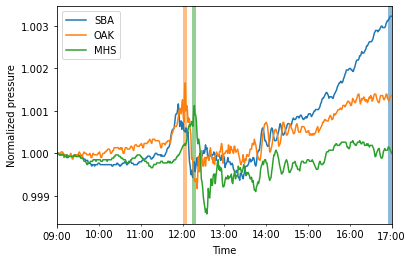

In [8]:
# read in csv
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/california_pressure_2022_01_15.csv', index_col=0, parse_dates=[0])
stations = ['SBA','OAK','MHS']
for station in stations:
    df[station] = df[station]/df[station][0]

df[stations].plot()
for i, station in enumerate(stations):
    time_max = df.index[df[station].argmax()]
    minutes_width = datetime.timedelta(minutes=2.5)
    plt.axvspan(time_max-minutes_width,time_max+minutes_width,alpha=0.5,color=f'C{i}',lw=0)
    
plt.xlabel('Time')
plt.ylabel('Normalized pressure')
plt.show()

b) What can you say about the similarity or dissimilarity of the three series? Why argument can you make that the similarities are due to the Tongan shockwave and not other effects? What do you notice about the location of the maximum of the three series?

`I noticed that the maximum pressure at the SBA station is at the end of the Series. This is likely just due to evening weather patterns and not the volcano. The volcano caused the sharp increase in pressure around 12:00. Below I find the maximum for all three Series before 14:00. Now, we see that the maximum pressure for all three stations are at the abrupt pressure change at ~12:00. `

`Looking at the plo tin the next cell... the series are all very similar at ~12:00, with an abrupt peak in pressure. The peaks are offset by ~5-10 minutes the stations are at different locations and it took time for the pressure wave to reach each respective station`

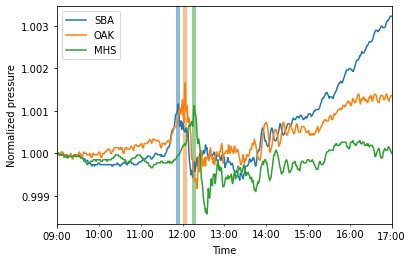

In [9]:
df[stations].plot()
for i, station in enumerate(stations):
    time_max = df.index[df[:300][station].argmax()]
    minutes_width = datetime.timedelta(minutes=2.5)
    plt.axvspan(time_max-minutes_width,time_max+minutes_width,alpha=0.5,color=f'C{i}',lw=0)
plt.xlabel('Time')
plt.ylabel('Normalized pressure')
plt.show()

c) On a map of California, create a static vizualization of the timelag of the passage of the shockwave through the 64 stations in California. You might find it helpful to detect significant changes at each station using rolling percent changes on ~5-10 minute intervals (cf. [`.pct_change(periods=...)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) in pandas). The file `data/ca_asos.csv` contains the latitude and longitude of the stations. 

<IPython.core.display.Javascript object>


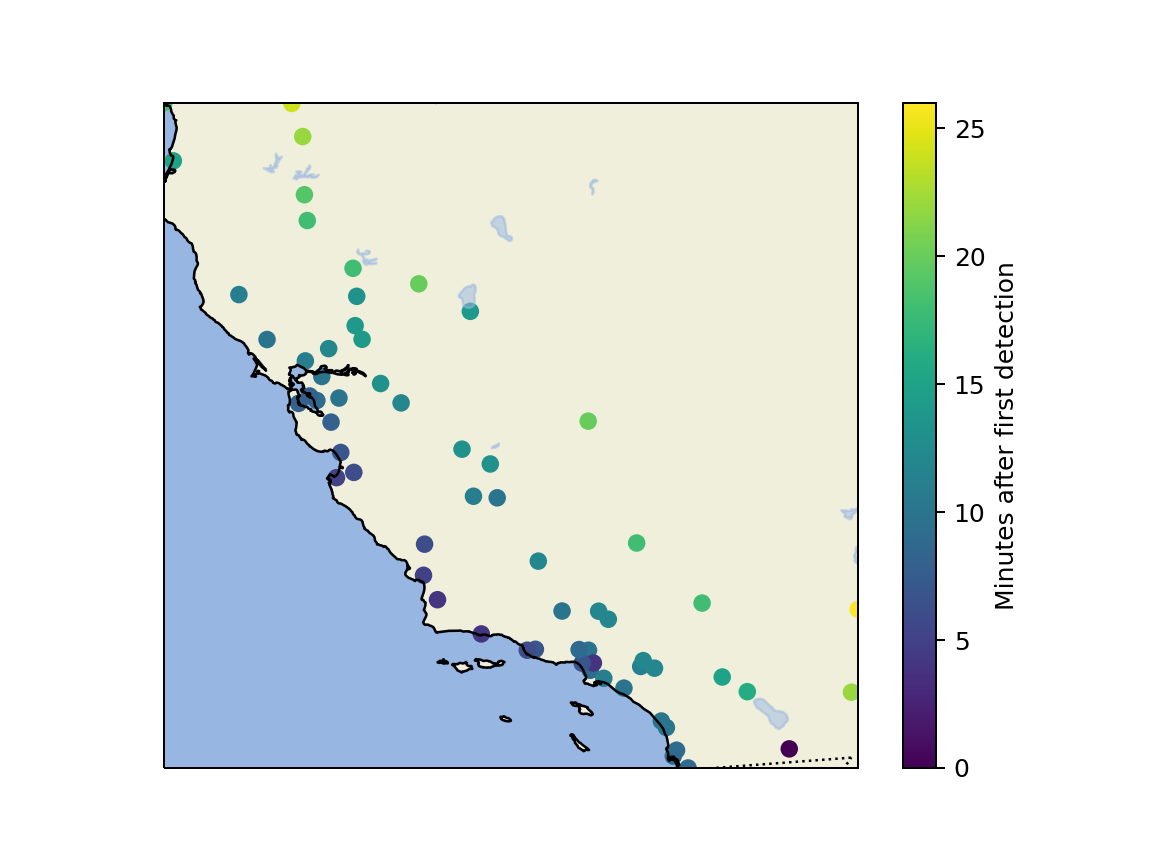

In [10]:
import cartopy

%matplotlib notebook
coords = pd.read_csv('data/ca_asos.csv')
pct = df.pct_change(periods=5)

stations = []
for col in coords['stid'].values:
    if col in df.columns: stations.append(col)

arrival_times, lat, lon = [],[],[]
for station in stations:
    arrival_times.append((df.index[np.argmin(pct[station])]-df.index[0]).total_seconds())
    lat.append(coords[coords['stid']==station]['lat'])
    lon.append(coords[coords['stid']==station]['lon'])
    
arrival_times = np.array(arrival_times)/60; lat = np.array(lat); lon =np.array(lon)
arrival_times -= np.min(arrival_times)

fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)

# figure out the map boundary 
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()])
# now overplot
t = ax.scatter(lon,lat,c=arrival_times)
cax = plt.colorbar(t)
cax.set_label('Minutes after first detection')
plt.show()


d) Pick one station and determine when you believe the shockwave first passed through that station. Using this information and the time of the explosion determine the speed of the shockwave. How does this compare to the speed of sound in air?

In [11]:
import geopy.distance

station = 'SFO'

coords_explode = (-20.550, -175.385)
coords_sfo = (coords[coords['stid']==station]['lat'].values[0], coords[coords['stid']==station]['lon'].values[0])
distance = geopy.distance.distance(coords_sfo, coords_explode).km

print('Coordinates of explosion: ', coords_explode)
print('Coordinates of {0}: '.format(station), coords_sfo)
print('Distance between explosion and {0}: {1:.1f} km'.format(station, distance))

print('\n')

t_explode = datetime.datetime(2022, 1, 15, 4, 14, 45, 0)
t_sfo = df.index[np.argmin(pct[station])]
dtime = (t_sfo-t_explode).total_seconds()

print('Time of explosion:', t_explode)
print('Time shockwave hit {0}:'.format(station), t_sfo)
print('Time for shokwave to travel to {0}: {1:.2f} hr'.format(station,dtime/3600))

print('\n')

speed_of_sound = distance/dtime * 1000
print('Calculated speed of sound: {:0.0f} m/s'.format(speed_of_sound))
print('Real speed of sound: 343 m/s')

Coordinates of explosion:  (-20.55, -175.385)
Coordinates of SFO:  (37.61897, -122.37489)
Distance between explosion and SFO: 8498.7 km


Time of explosion: 2022-01-15 04:14:45
Time shockwave hit SFO: 2022-01-15 12:16:00
Time for shokwave to travel to SFO: 8.02 hr


Calculated speed of sound: 294 m/s
Real speed of sound: 343 m/s


`I find that the calculated speed of sound is quite a bit lower than expected. But then I realized that the time I'm using as "time shockwave hit SFO" is the time when the pressure dramatically changed from high to low. BUT there is a ramp up before this rapid change in pressure. This "ramp up" should arrive closer to the speed of sound. When I use this time instead (I found it by eye), I get:`

Calculated speed of sound: 325 m/s
Real speed of sound: 343 m/s


<IPython.core.display.Javascript object>


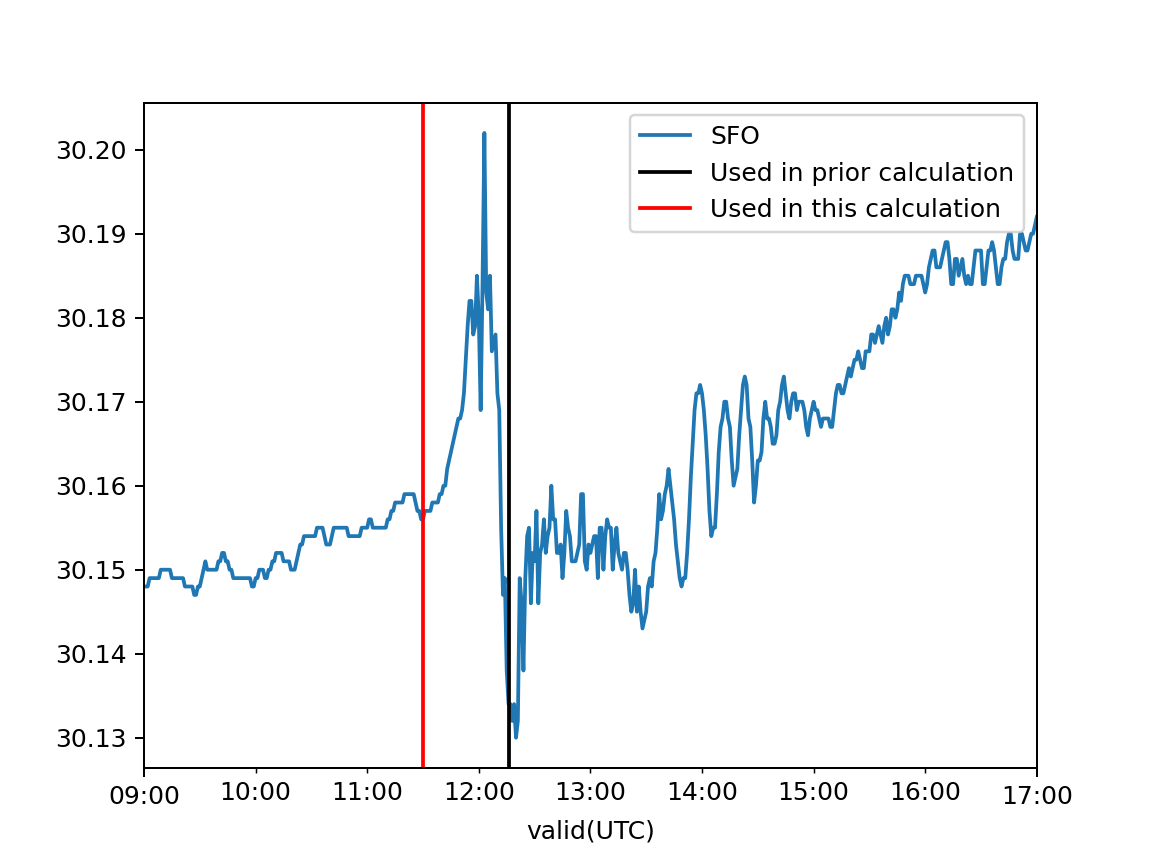

In [12]:
t_explode = datetime.datetime(2022, 1, 15, 4, 14, 45, 0)
t_new_sfo = datetime.datetime(2022, 1, 15, 11, 30, 0, 0)
dtime = (t_new_sfo-t_explode).total_seconds()

speed_of_sound = distance/dtime * 1000
print('Calculated speed of sound: {:0.0f} m/s'.format(speed_of_sound))
print('Real speed of sound: 343 m/s')

plt.figure()
df['SFO'].plot()
plt.axvline(t_sfo,c='k',label='Used in prior calculation')
plt.axvline(t_new_sfo,c='r',label='Used in this calculation')
plt.legend()

**EXTRA CREDIT**  Produce an animation of passage of the shockwave through California using this dataset. Hint: take at look at `matplotlib.animation.FuncAnimation`.

In [13]:
'''import matplotlib.pyplot as plt
import numpy as np

# for the animation
fig = plt.figure()
axis = plt.axes(xlim =(-50, 50),
                ylim =(-50, 50))
 
line, = axis.plot([], [], lw = 2)
 
# what will our line dataset
# contain?
def init():
    line.set_data([], [])
    return line,
 
# initializing empty values
# for x and y co-ordinates
xdata, ydata = [], []
 
# animation function
def animate(i):
    # t is a parameter which varies
    # with the frame number
    t = 0.1 * i
     
    # x, y values to be plotted
    x = t * np.sin(t)
    y = t * np.cos(t)
     
    # appending values to the previously
    # empty x and y data holders
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
     
    return line,
 
# calling the animation function    
anim = animation.FuncAnimation(fig, animate,
                            init_func = init,
                            frames = 500,
                            interval = 20,
                            blit = True)
 
# saves the animation in our desktop
anim.save('growingCoil.mp4', writer = 'ffmpeg', fps = 30)'''

"import matplotlib.pyplot as plt\nimport numpy as np\n\n# for the animation\nfig = plt.figure()\naxis = plt.axes(xlim =(-50, 50),\n                ylim =(-50, 50))\n \nline, = axis.plot([], [], lw = 2)\n \n# what will our line dataset\n# contain?\ndef init():\n    line.set_data([], [])\n    return line,\n \n# initializing empty values\n# for x and y co-ordinates\nxdata, ydata = [], []\n \n# animation function\ndef animate(i):\n    # t is a parameter which varies\n    # with the frame number\n    t = 0.1 * i\n     \n    # x, y values to be plotted\n    x = t * np.sin(t)\n    y = t * np.cos(t)\n     \n    # appending values to the previously\n    # empty x and y data holders\n    xdata.append(x)\n    ydata.append(y)\n    line.set_data(xdata, ydata)\n     \n    return line,\n \n# calling the animation function    \nanim = animation.FuncAnimation(fig, animate,\n                            init_func = init,\n                            frames = 500,\n                            interval = 2